# Import Library

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collect Data

In [43]:
train_data = pd.read_csv("Well A.csv")
train_data.head()

,DEPTH_MD,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DRHO,FACIES
0,734.419199,12.787381,NaN,1.407795,1.472684,NaN,118.992989,NaN,NaN,154.404816,NaN,9.875,26.911829,NaN,1
1,734.571200,12.790987,NaN,1.394810,1.464091,NaN,124.514305,NaN,NaN,154.974701,NaN,9.875,26.133530,NaN,1
2,734.723199,12.801331,NaN,1.377496,1.434632,NaN,126.779854,NaN,NaN,155.762970,NaN,9.875,27.482636,NaN,1
3,734.875200,12.628396,NaN,1.369218,1.419665,NaN,127.186066,NaN,NaN,156.187897,NaN,9.875,28.694523,NaN,1
4,735.027200,12.528492,NaN,1.373198,1.427742,NaN,125.184708,NaN,NaN,157.038986,NaN,9.875,28.981676,NaN,1


In [44]:
train_data.shape

(10708, 15)

In [45]:
train_data.columns

Index(['DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DRHO', 'FACIES'],
      dtype='object')

In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10708 entries, 0 to 10707
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DEPTH_MD  10708 non-null  float64
 1   CALI      10708 non-null  float64
 2   RSHA      0 non-null      float64
 3   RMED      10675 non-null  float64
 4   RDEP      10699 non-null  float64
 5   RHOB      10396 non-null  float64
 6   GR        10708 non-null  float64
 7   NPHI      10565 non-null  float64
 8   PEF       10396 non-null  float64
 9   DTC       10643 non-null  float64
 10  SP        0 non-null      float64
 11  BS        10708 non-null  float64
 12  ROP       10708 non-null  float64
 13  DRHO      10472 non-null  float64
 14  FACIES    10708 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.2 MB


In [47]:
train_data.dtypes

DEPTH_MD    float64
CALI        float64
RSHA        float64
RMED        float64
RDEP        float64
RHOB        float64
GR          float64
NPHI        float64
PEF         float64
DTC         float64
SP          float64
BS          float64
ROP         float64
DRHO        float64
FACIES        int64
dtype: object

In [48]:
train_data.FACIES.value_counts()

1    5237
2    1808
4    1796
6    1148
3     572
5     147
Name: FACIES, dtype: int64

In [49]:
labels = train_data["FACIES"].value_counts().to_dict()

# Data cleaning and preparation

<Axes: >

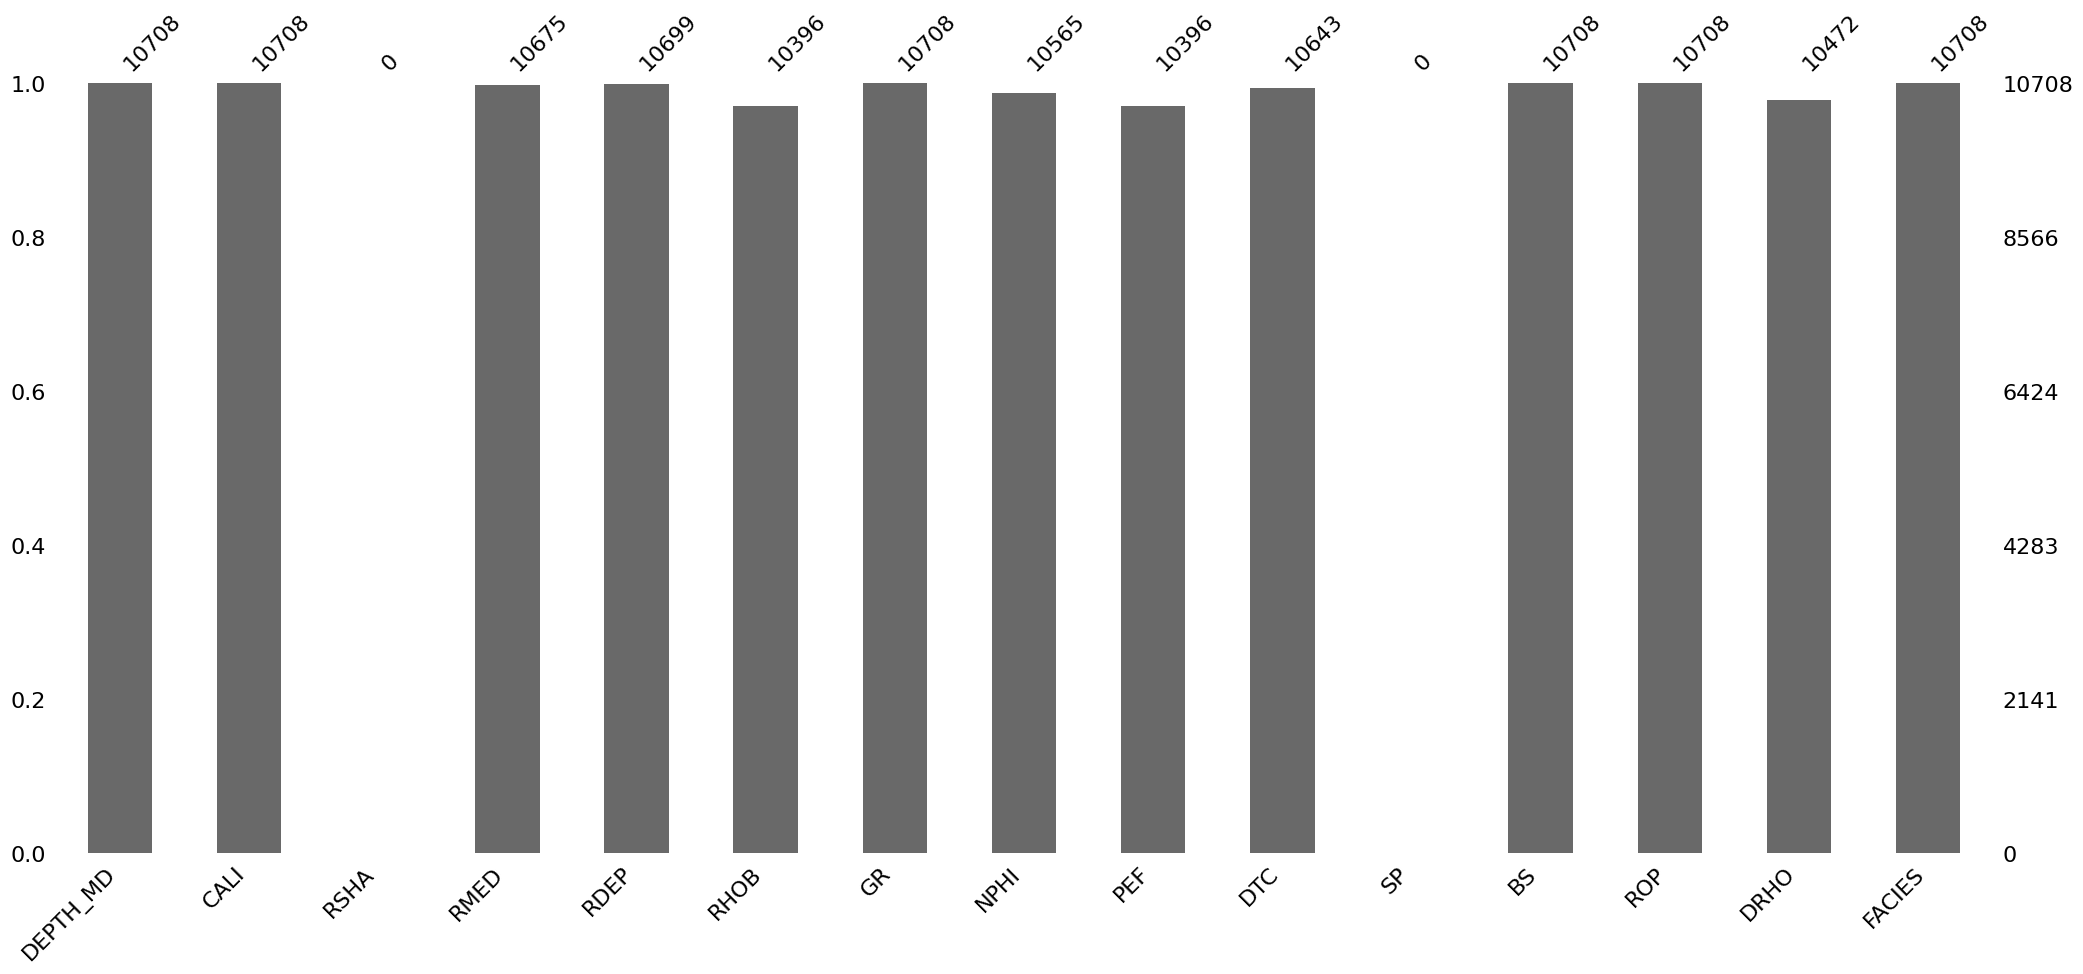

In [50]:
import missingno as msno
msno.bar(train_data)

In [51]:
train_data = train_data.drop(["ROP","BS",'RSHA',"SP"],axis=1)

In [52]:
train_data.dropna(inplace=True)
train_data

,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,DRHO,FACIES
130,754.179199,12.521476,1.412026,1.315972,2.079341,115.562035,0.495291,5.906584,143.338440,0.032364,1
131,754.331200,12.630612,1.398117,1.315344,2.077192,113.619270,0.501820,6.384551,143.411118,0.039953,1
132,754.483199,12.726549,1.394453,1.323453,2.076251,116.701439,0.522005,7.069182,143.314133,0.054563,1
133,754.635199,12.860774,1.415387,1.336856,2.078405,118.532913,0.546147,7.836967,143.667496,0.072767,1
134,754.787200,12.904781,1.389204,1.309308,2.079669,119.113991,0.558983,7.969746,145.145447,0.074599,1
...,...,...,...,...,...,...,...,...,...,...,...
10638,2351.395200,8.495781,2.419575,2.432598,2.446120,83.710793,0.206534,3.299096,81.848648,0.011542,3
10639,2351.547200,8.501786,2.298789,2.297934,2.444777,85.365189,0.198399,3.322829,91.259453,0.016520,3
10640,2351.699200,8.514043,2.244636,2.242675,2.433254,84.372864,0.206373,3.293875,94.804581,0.023240,3
10641,2351.851200,8.496308,2.178133,2.187869,2.415897,79.731628,0.199548,3.156241,93.250061,0.024025,2


<Axes: >

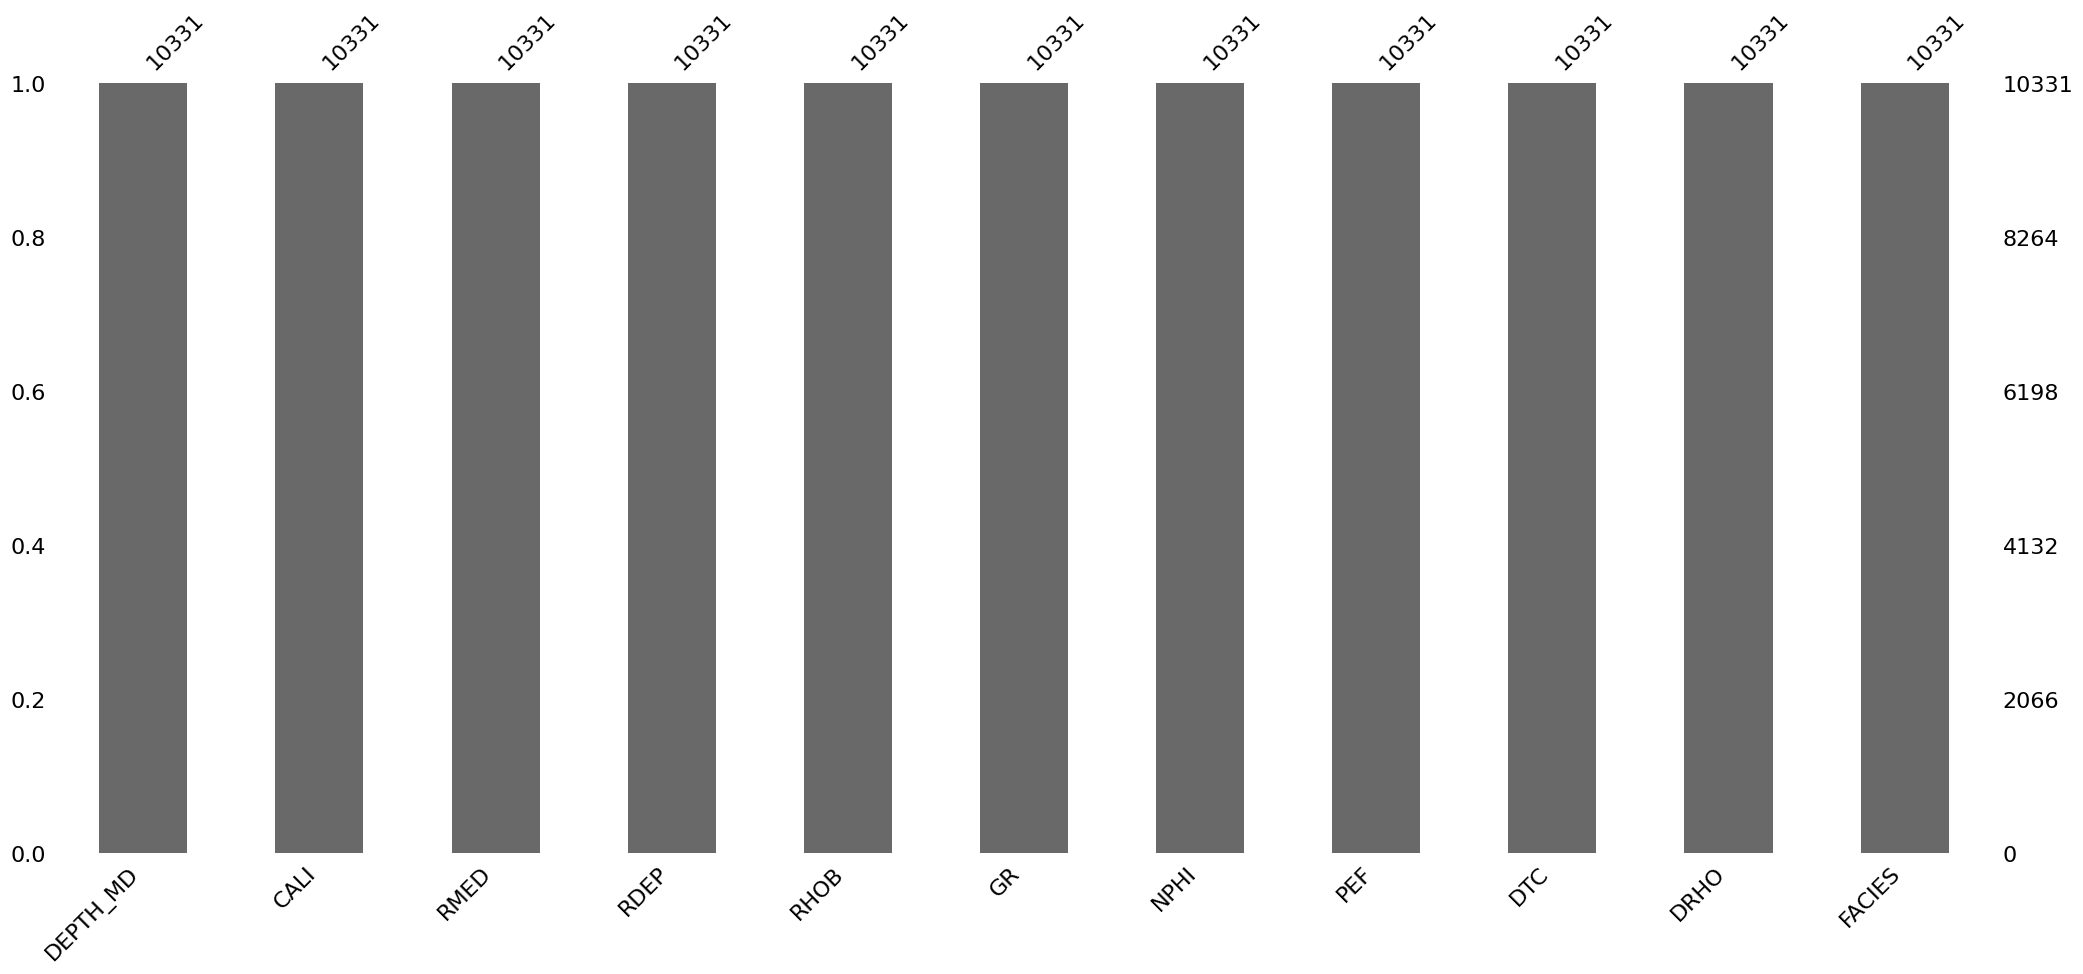

In [53]:
msno.bar(train_data)

# SVM Algorithm

In [54]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [55]:
X = train_data[["RDEP", "RHOB", "GR", "NPHI", "PEF", "DTC"]]
y = train_data["FACIES"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### SVM model

In [57]:
svm = svm.SVC()

In [58]:
svm.fit(X_train, y_train)

SVC()

In [59]:
y_pred = svm.predict(X_test)

### evaluation model

In [60]:
#accuracy report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8687096774193548


In [61]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.98      0.96      1532
           2       0.84      0.82      0.83       567
           3       0.52      0.09      0.15       147
           4       0.91      0.92      0.91       504
           5       0.00      0.00      0.00        48
           6       0.61      0.84      0.71       302

    accuracy                           0.87      3100
   macro avg       0.64      0.61      0.59      3100
weighted avg       0.85      0.87      0.85      3100



c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
import seaborn as sns

In [64]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[1495   10    7    0    0   20]
 [  16  465    5   20    0   61]
 [  53   25   13    0    0   56]
 [   4   20    0  465    0   15]
 [   9   25    0    0    0   14]
 [  10    9    0   28    0  255]]


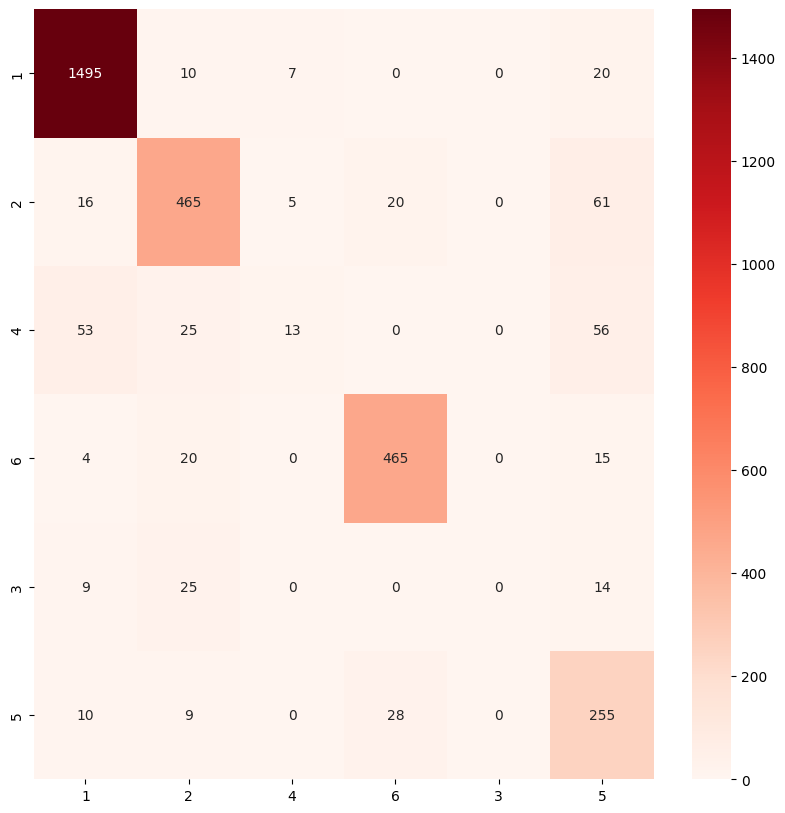

In [65]:
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap="Reds", fmt=".0f",
                 xticklabels=labels,
                 yticklabels=labels)

### Implementation model using blind dataset

In [66]:
test_data = pd.read_csv("Well B.csv")

In [67]:
# Contoh pembersihan dan persiapan data pada dataset baru
test_data = test_data.drop(["ROP","BS",'RSHA',"SP"], axis=1)
test_data.dropna(inplace=True)

In [69]:
# Pilih fitur pada dataset baru yang sesuai dengan fitur pada dataset pelatihan
X_test_new = test_data[["RDEP", "RHOB", "GR", "NPHI", "PEF", "DTC"]]

# Lakukan prediksi menggunakan model
y_pred_new = svm.predict(X_test_new)

# Menyertakan label sebenarnya dari dataset baru
true_labels_new = test_data["FACIES"]

In [70]:
# Accuracy report pada dataset baru
accuracy_new = accuracy_score(true_labels_new, y_pred_new)
print(f"Accuracy on new dataset: {accuracy_new}")

# Classification report pada dataset baru
print(classification_report(true_labels_new, y_pred_new))

Accuracy on new dataset: 0.7765735723218008
              precision    recall  f1-score   support

           1       0.90      0.98      0.94      5670
           2       0.46      0.49      0.47      1237
           3       0.25      0.37      0.30       264
           4       0.88      0.60      0.71      1277
           5       0.00      0.00      0.00       168
           6       0.50      0.47      0.48       905
           7       0.00      0.00      0.00        75

    accuracy                           0.78      9596
   macro avg       0.43      0.42      0.42      9596
weighted avg       0.76      0.78      0.76      9596



c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


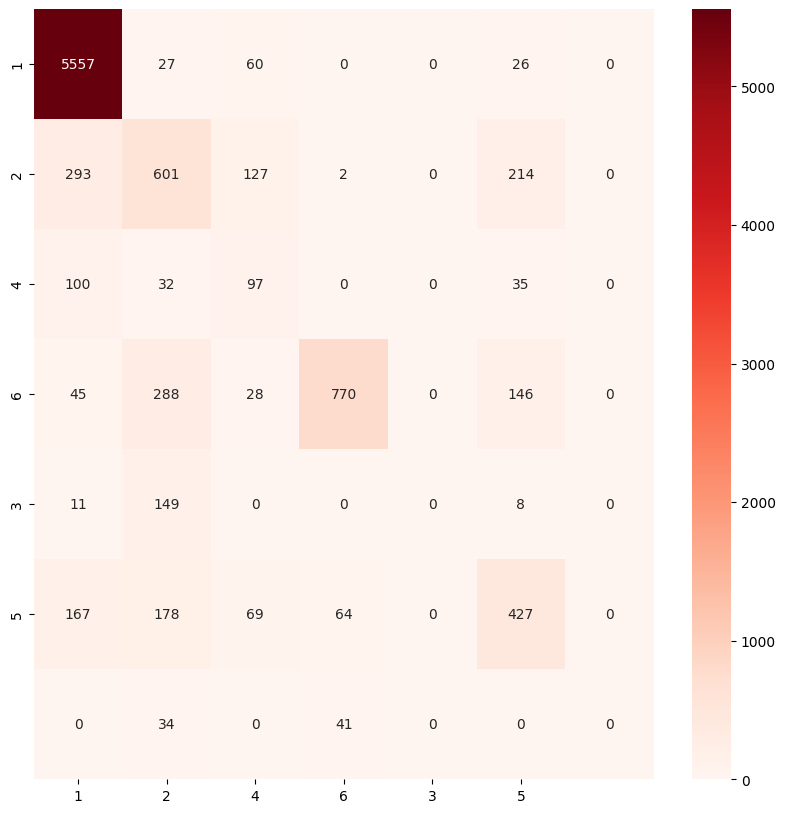

In [71]:
# Confusion matrix pada dataset baru
cf_matrix_new = confusion_matrix(true_labels_new, y_pred_new)
# print(cf_matrix_new)

# Visualisasi confusion matrix pada dataset baru
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix_new, annot=True, cmap="Reds", fmt=".0f",
                 xticklabels=labels, yticklabels=labels)

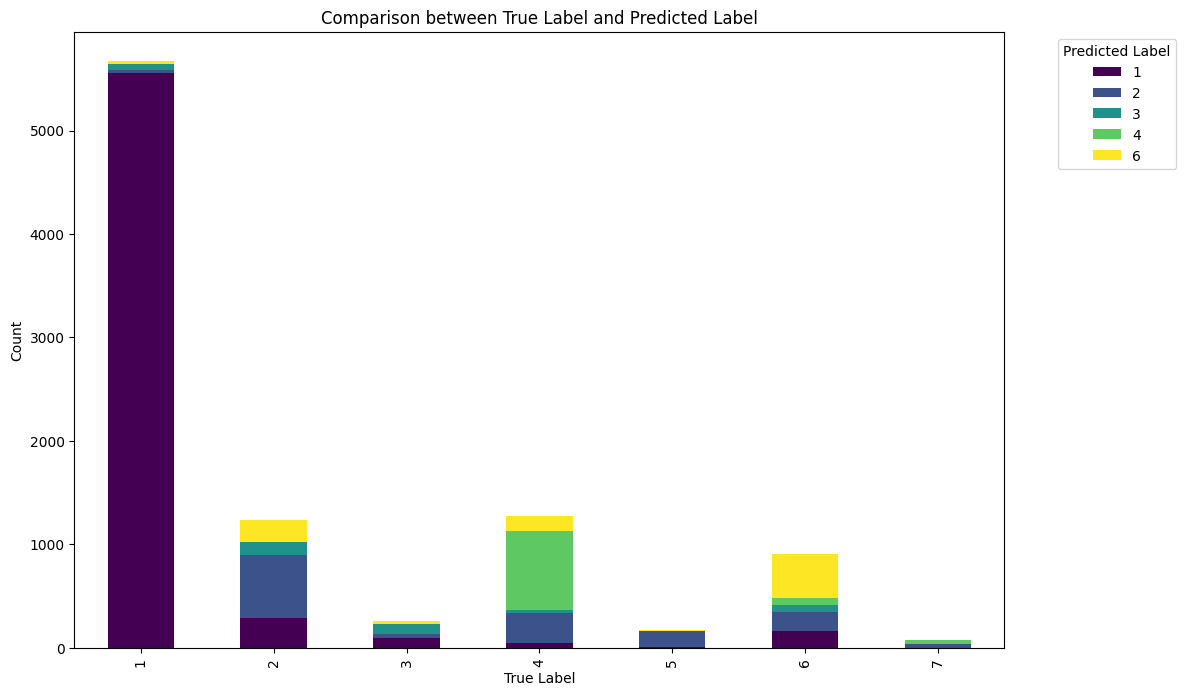

In [72]:
# Import library yang diperlukan
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat DataFrame baru untuk membandingkan true label dan predicted label
comparison_df = pd.DataFrame({'True Label': true_labels_new, 'Predicted Label': y_pred_new})

# Menghitung frekuensi masing-masing label
label_counts = comparison_df.groupby(['True Label', 'Predicted Label']).size().unstack(fill_value=0)

# Plot bar untuk membandingkan true label dan predicted label
label_counts.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')
plt.title('Comparison between True Label and Predicted Label')
plt.xlabel('True Label')
plt.ylabel('Count')
plt.legend(title='Predicted Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

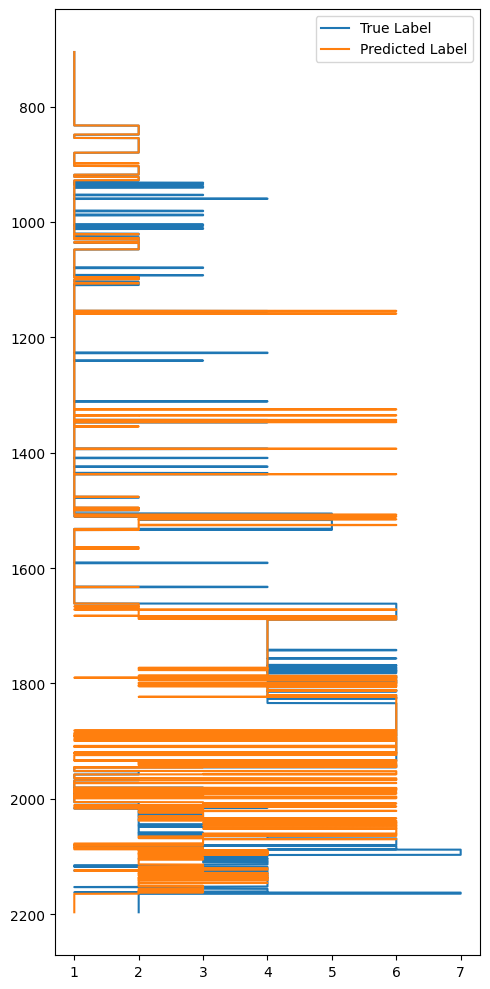

In [73]:
figure, ax = plt.subplots(figsize=(5,10))
logs = test_data.sort_values(by='DEPTH_MD')
ax.plot(logs.FACIES, logs.DEPTH_MD, label='True Label')
ax.plot(y_pred_new, logs.DEPTH_MD, label='Predicted Label')
ax.invert_yaxis()
# ax.set_xlabel(features[i])
plt.tight_layout()
plt.legend()